In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


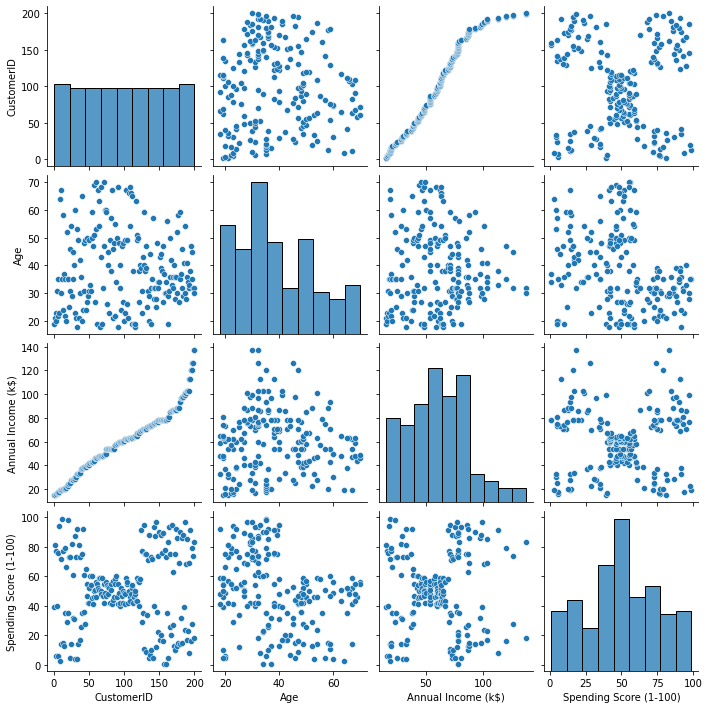

In [5]:
import seaborn as sns
sns.pairplot(data)

Correlation

In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


customerId boxplot for data analysing

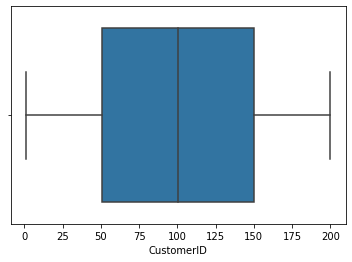

In [7]:
sns.boxplot(data['CustomerID'])

Age boxplot for data analysing

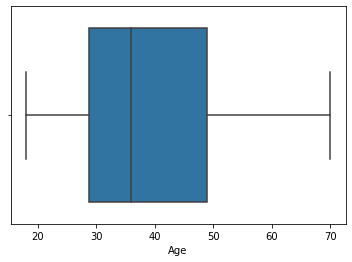

In [8]:
sns.boxplot(data["Age"])

Annual Income boxplot for data analysing

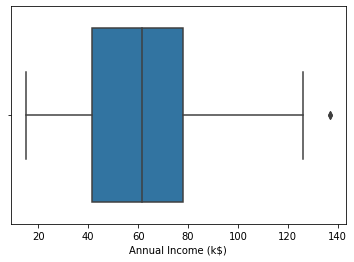

In [9]:
sns.boxplot(data['Annual Income (k$)'])

Spending Score boxplot for data analysing

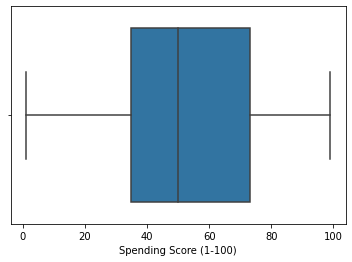

In [10]:
sns.boxplot(data['Spending Score (1-100)'])

Analyzing the data with respect to "Spending Score"

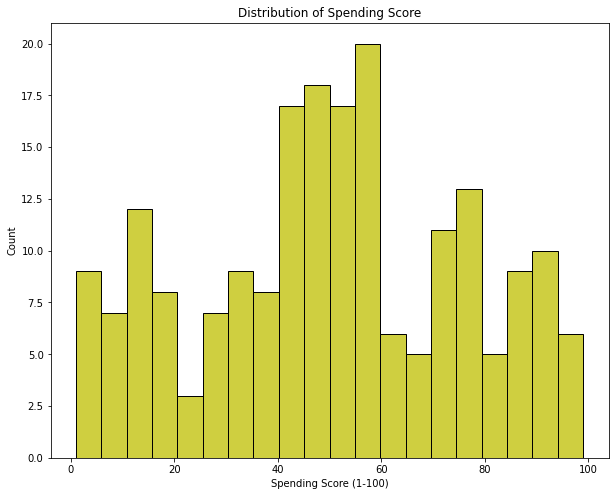

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(data['Spending Score (1-100)'], bins= 20, color='y')
plt.title("Distribution of Spending Score")
plt.show()

Distribution of Annual Income

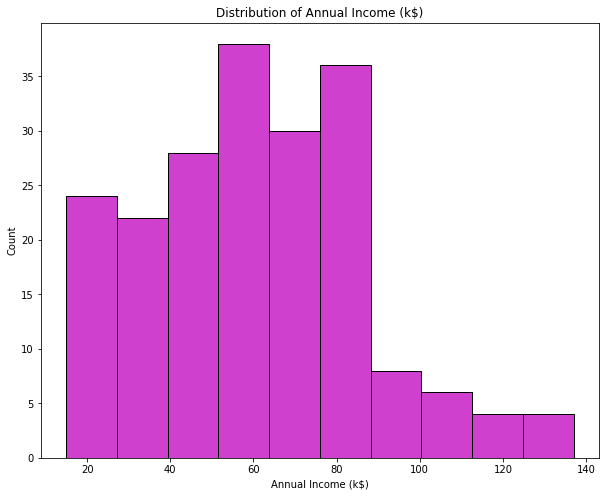

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data['Annual Income (k$)'], color='m')
plt.title("Distribution of Annual Income (k$)")
plt.show()

Most customers visiting Mall have Annual Income of 50k to 80k.

Average Income distribution by Gender

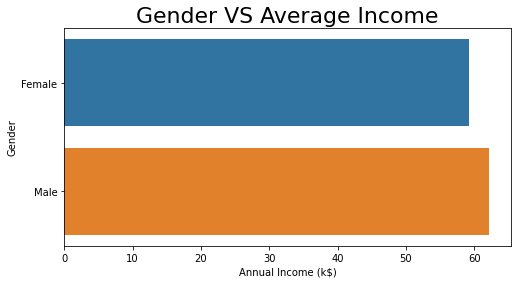

In [13]:
gender_income = data.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data= gender_income, y='Gender', x='Annual Income (k$)')
plt.title("Gender VS Average Income", fontsize = 22)
plt.show()

Males have more average Annual Income than Females

In [14]:
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


Gender Distribution

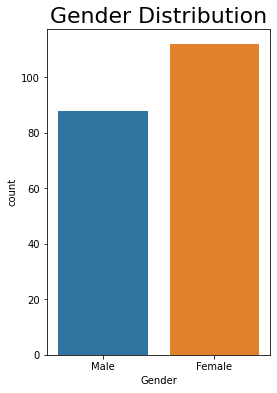

In [15]:
plt.figure(figsize=(4,6))
sns.countplot(data['Gender'])
plt.title("Gender Distribution", fontsize = 22)
plt.show()

Distribution of Annual Income & Age

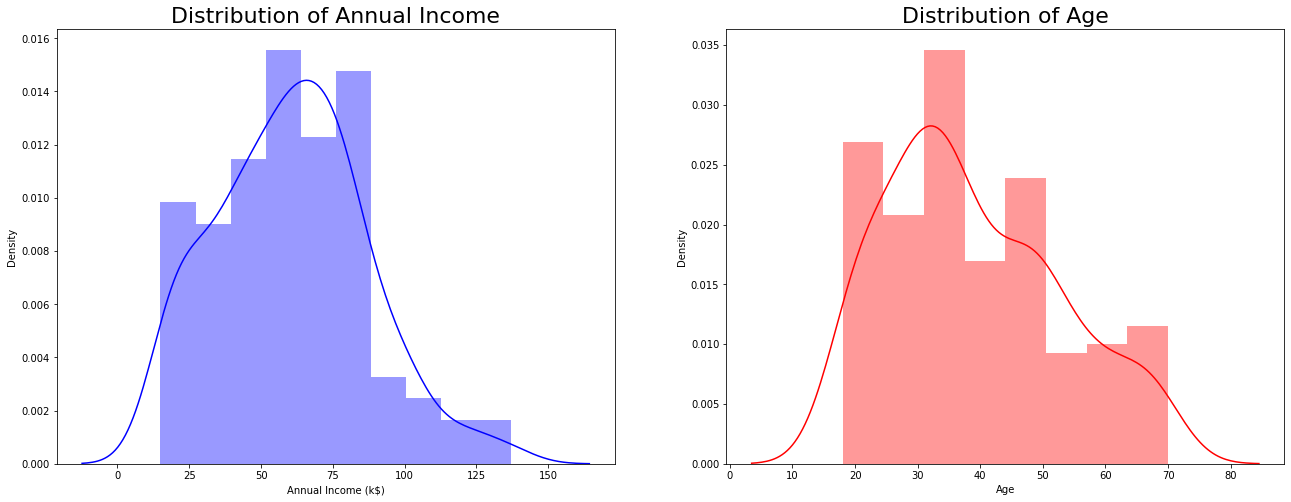

In [17]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.distplot(data['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income", fontsize = 22)

plt.subplot(1,2,2)
sns.distplot(data['Age'], color='r')
plt.title("Distribution of Age", fontsize = 22)
plt.show()

Most of the People earn 40k to 80k annually. Very few people earn more than 100k. And the least annual income is 20k Most mall visitors are of age 20 to 35 years old. Senior citizens visits less to the mall.

Clustering

Finding Clusters who relates to similar behaviour according to "Age, Annual Income & Spending Score"

In [20]:
X = data.iloc[:,2:]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


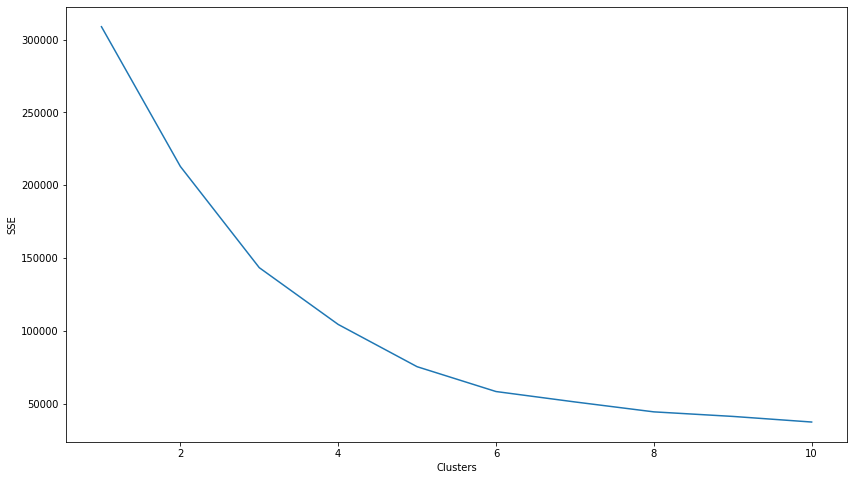

In [21]:
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)

# plotting the Elbow
plt.figure(figsize = (14, 8))
plt.plot(np.arange(1,11), Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

Fitting the model on optimum Clusters

In [22]:
K_model = KMeans(n_clusters = 3)
K_model.fit(X)

KMeans(n_clusters=3)

In [24]:
clusters = K_model.labels_
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

Assigning the fitted Clusters to the X data to Visualize

In [25]:
X = X.assign(cluster = clusters)
X.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),cluster
59,53,46,46,2
45,24,39,65,2
20,35,24,35,2
198,32,137,18,0
151,39,78,88,1
130,47,71,9,0
26,45,28,32,2
170,40,87,13,0
116,63,65,43,2
112,38,64,42,2


Visualizing the Clusters

In [26]:
import plotly.express as px

fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Finally, Successfully Segmented our Customers According to their Behaviors using Clustering Technique